## 1. Import Libraries

In [1]:
# We import the libraries we need
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# This sets a nice style for the plots
sns.set(style='whitegrid', context='notebook')

## 2. Load the Data

In [2]:
# We load the CSV file. The path goes up one folder then into data/raw
data_path = '../data/raw/housing.csv'
# This reads the csv file into a pandas DataFrame
df = pd.read_csv(data_path)
# This shows the first 5 rows of the data
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


## 3. Basic Shape and Columns

In [7]:
# This prints number of rows and columns
print(df.shape)
# This lists all column names
df.columns.tolist()

(20640, 10)


['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'median_house_value',
 'ocean_proximity']

## 4. Data Info and Types

In [8]:
# This shows column types and non-missing counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


## 5. Basic Statistics

In [9]:
# This shows simple statistics like mean and std
df.describe().T

,count,mean,std,min,25%,50%,75%,max
longitude,20640.0,-119.569704,2.003532,-124.3500,-121.8000,-118.4900,-118.01000,-114.3100
latitude,20640.0,35.631861,2.135952,32.5400,33.9300,34.2600,37.71000,41.9500
housing_median_age,20640.0,28.639486,12.585558,1.0000,18.0000,29.0000,37.00000,52.0000
total_rooms,20640.0,2635.763081,2181.615252,2.0000,1447.7500,2127.0000,3148.00000,39320.0000
total_bedrooms,20433.0,537.870553,421.385070,1.0000,296.0000,435.0000,647.00000,6445.0000
population,20640.0,1425.476744,1132.462122,3.0000,787.0000,1166.0000,1725.00000,35682.0000
households,20640.0,499.539680,382.329753,1.0000,280.0000,409.0000,605.00000,6082.0000
median_income,20640.0,3.870671,1.899822,0.4999,2.5634,3.5348,4.74325,15.0001
median_house_value,20640.0,206855.816909,115395.615874,14999.0000,119600.0000,179700.0000,264725.00000,500001.0000


## 6. Missing Values

In [10]:
# This counts missing values in each column
df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

## 7. Distributions of Numeric Features

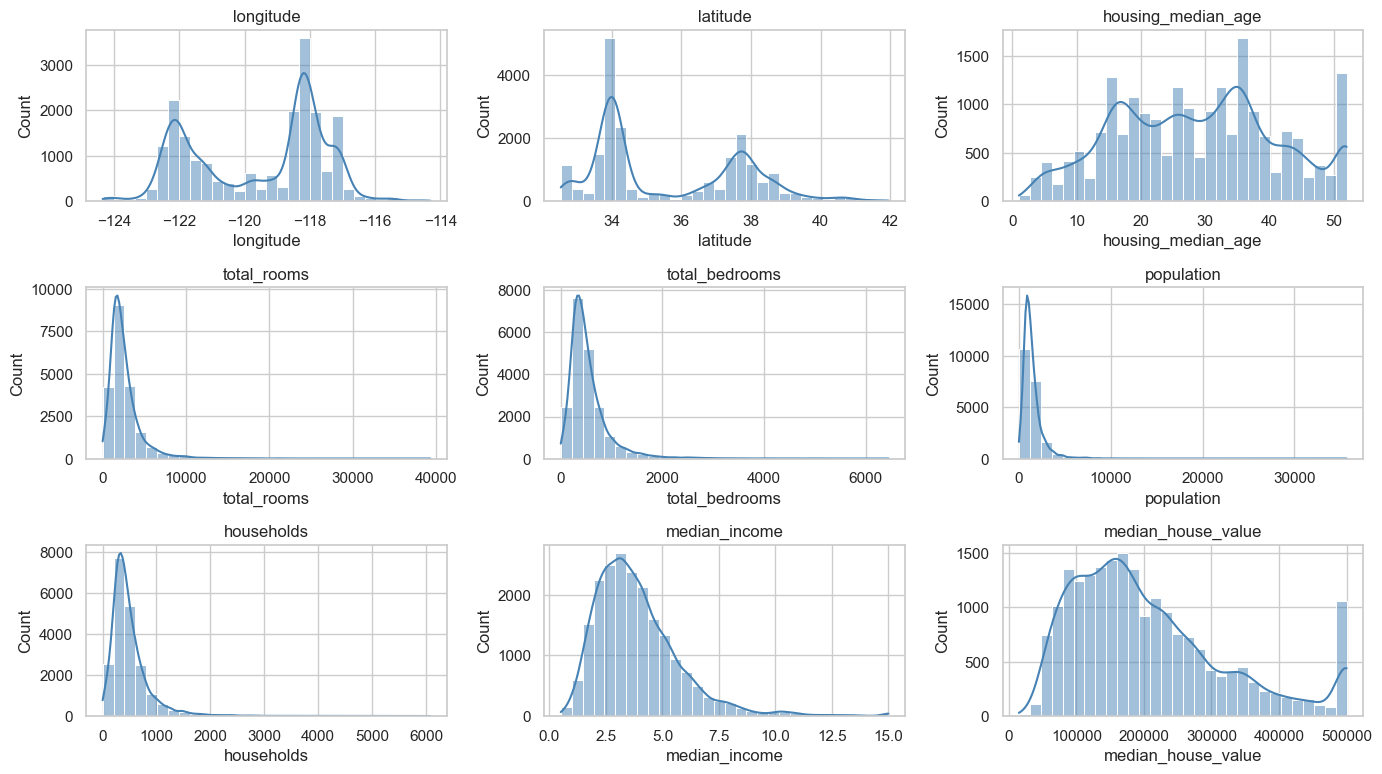

In [11]:
# We plot histograms for numeric columns
numeric_cols = df.select_dtypes(include=[np.number]).columns
plt.figure(figsize=(14, 10))
# Loop through columns and plot
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(len(numeric_cols)//3 + 1, 3, i)
    # Plot a histogram for the column
    sns.histplot(df[col], kde=True, bins=30, color='steelblue')
    plt.title(col)
plt.tight_layout()
plt.show()

## 8. Ocean Proximity Value Counts

In [12]:
# This shows how many rows for each category
df['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

## 9. Boxplots to See Value Distribution by Category

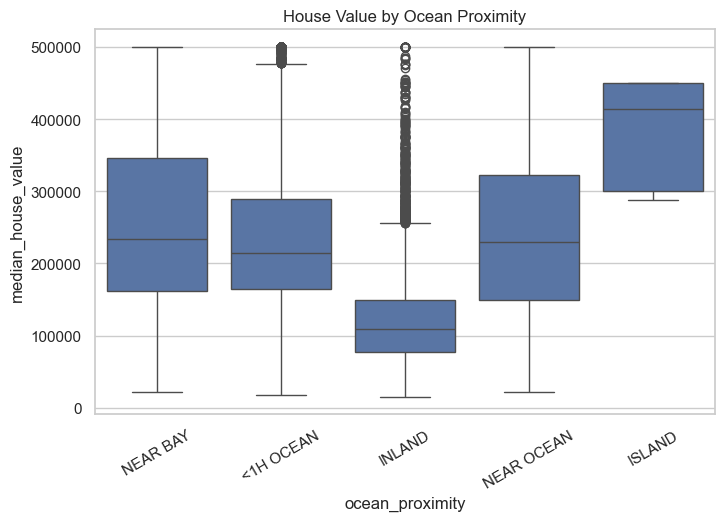

In [13]:
# We draw a boxplot of house value across categories
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='ocean_proximity', y='median_house_value')
plt.title('House Value by Ocean Proximity')
plt.xticks(rotation=30)
plt.show()

## 10. Create Simple Extra Features

In [14]:
# We make new columns to understand relationships
# This shows average rooms per household
df['rooms_per_household'] = df['total_rooms'] / df['households']
# This shows bedrooms per room
df['bedrooms_per_room'] = df['total_bedrooms'] / df['total_rooms']
# This shows population per household
df['population_per_household'] = df['population'] / df['households']
# We check first 5 rows of new columns
df[['rooms_per_household','bedrooms_per_room','population_per_household']].head()

,rooms_per_household,bedrooms_per_room,population_per_household
0,6.984127,0.146591,2.555556
1,6.238137,0.155797,2.109842
2,8.288136,0.129516,2.802260
3,5.817352,0.184458,2.547945
4,6.281853,0.172096,2.181467


## 11. Correlation Heatmap

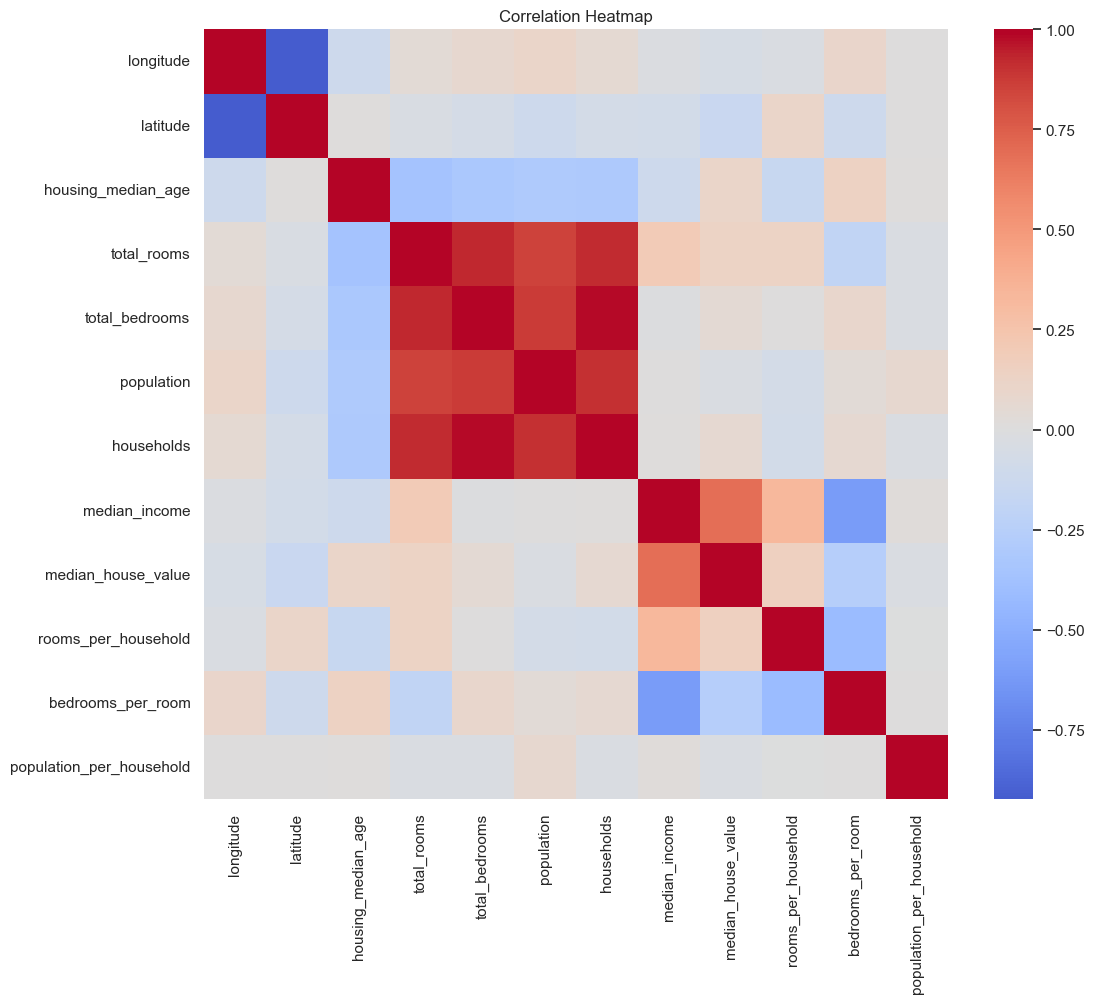

In [15]:
# We make a correlation matrix of numeric features
corr = df.select_dtypes(include=[np.number]).corr()
plt.figure(figsize=(12,10))
# We draw a heatmap to see strong positive or negative relations
sns.heatmap(corr, annot=False, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

## 12. Pairplot of Selected Features

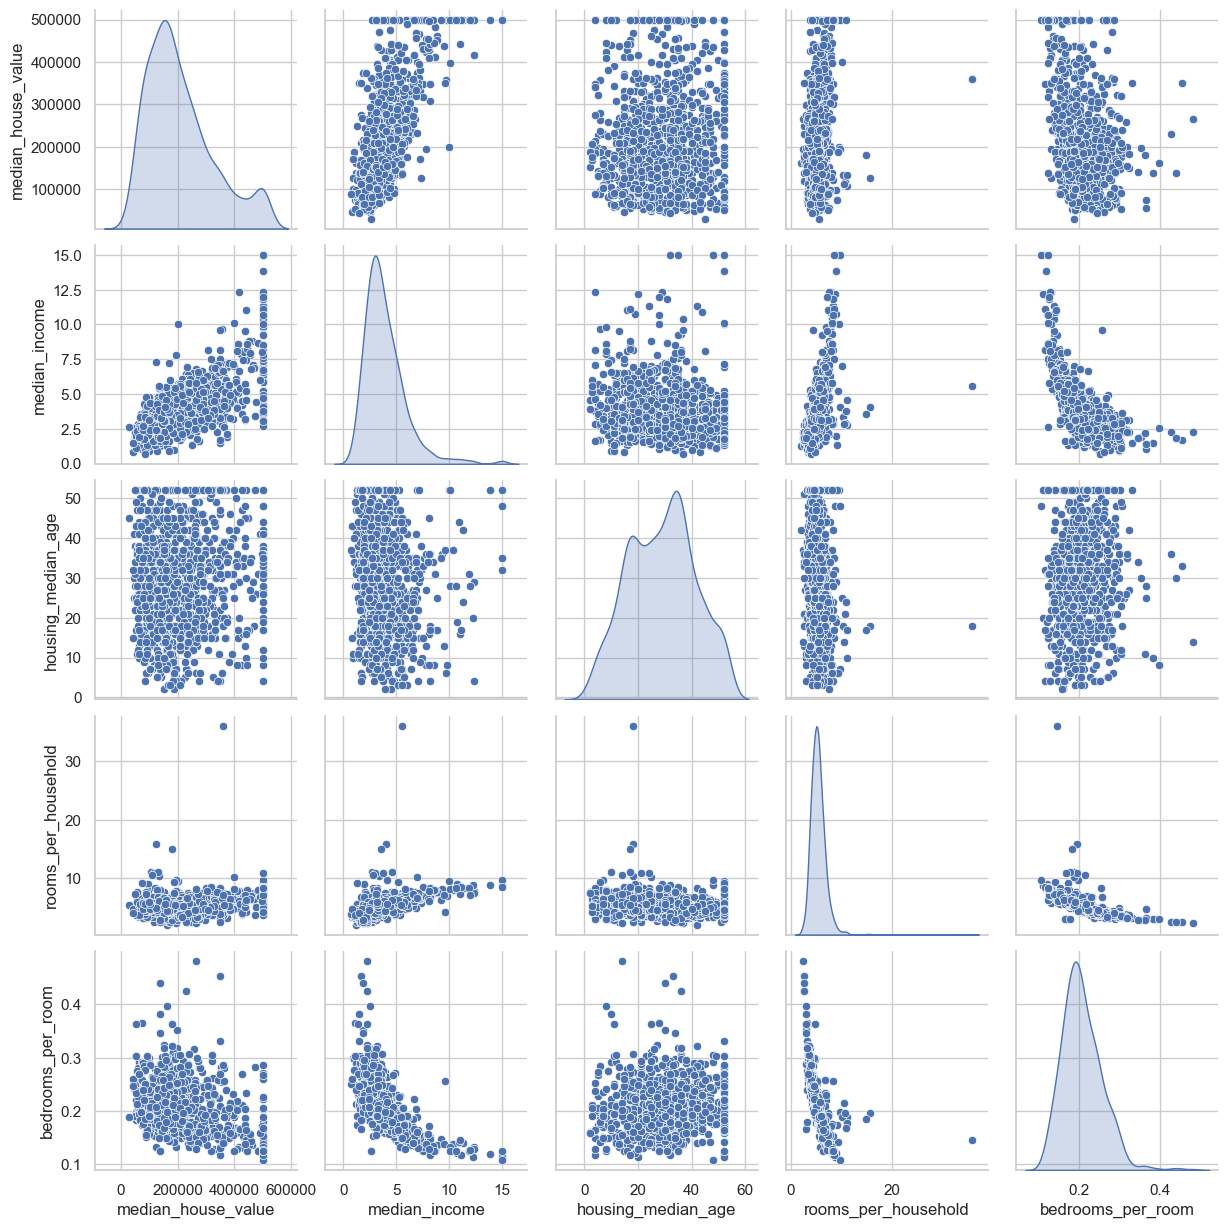

In [16]:
# We choose a few features to see pairwise plots
selected = ['median_house_value','median_income','housing_median_age','rooms_per_household','bedrooms_per_room']
# Pairplot can be slow if many rows. We sample a small part for speed.
sample_df = df[selected].sample(min(1000, len(df)), random_state=42)
sns.pairplot(sample_df, diag_kind='kde')

## 13. Scatter Plots of Important Relationships

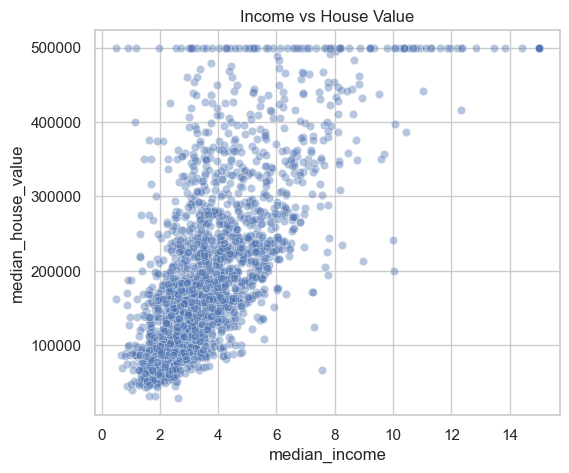

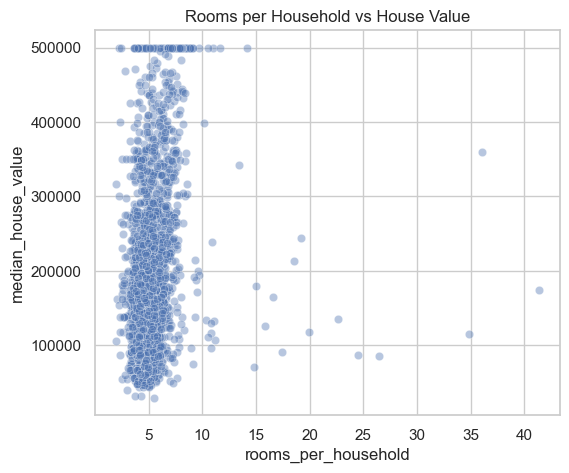

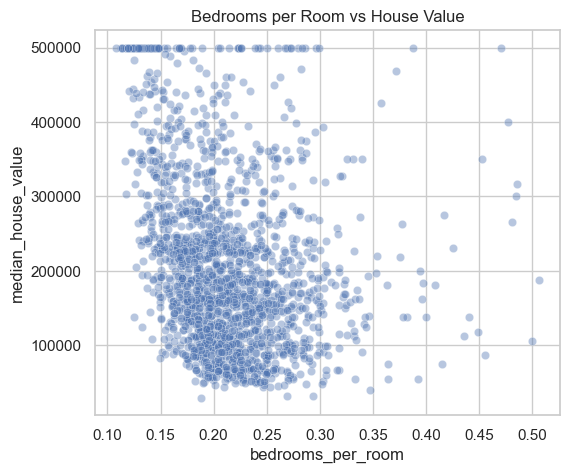

In [17]:
# Scatter plot: median income vs house value
plt.figure(figsize=(6,5))
sns.scatterplot(data=df.sample(min(2000, len(df)), random_state=42), x='median_income', y='median_house_value', alpha=0.4)
plt.title('Income vs House Value')
plt.show()
# Scatter plot: rooms per household vs house value
plt.figure(figsize=(6,5))
sns.scatterplot(data=df.sample(min(2000, len(df)), random_state=42), x='rooms_per_household', y='median_house_value', alpha=0.4)
plt.title('Rooms per Household vs House Value')
plt.show()
# Scatter plot: bedrooms per room vs house value
plt.figure(figsize=(6,5))
sns.scatterplot(data=df.sample(min(2000, len(df)), random_state=42), x='bedrooms_per_room', y='median_house_value', alpha=0.4)
plt.title('Bedrooms per Room vs House Value')
plt.show()

## 14. Simple Summary

In [18]:
# We print a small summary sentence
print('We explored shapes, distributions, correlations and simple feature relations.')

We explored shapes, distributions, correlations and simple feature relations.
